# protostars
## 13- CO and NaI lines
### I. Save the a subset of the spectrum to HDF5 (chunking)

Here we save the data to HDF5 so Starfish can read it in.

Michael Gully-Santiago  
April 2017

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('notebook')

## Read in all the data.
No spot-checking necessary, since we already did that in the previous notebook.

In [3]:
import pandas as pd

In [4]:
dat = pd.read_csv('../data/spectra/S68N_2014Jun_noemis.txt', delim_whitespace=True, names=['wavelength_A', 'flux'])
dat.head()

,wavelength_A,flux
0,20601.230469,4609.675
1,20605.507227,4834.167
2,20609.783986,4523.667
3,20614.060745,4712.858
4,20618.337503,4790.297


In [5]:
dat['flux'] = dat['flux']/np.median(dat['flux'])

## Save the file format
We want HDF5, actually...

Do some data munging.

In [6]:
wavelength_angstrom = np.array(dat.wavelength_A.values)
f_star = np.array(dat.flux.values)
sig_star = f_star*1.0/30.0

^^Assumes $S/N = 30$

In [7]:
masks = (f_star != f_star) | ((sig_star != sig_star))

In [8]:
masks.sum()

0

In [9]:
import h5py

In [10]:
name_out = 'S68N_NIRSPEC_CO_NaI.hdf5'

In [11]:
gi = (wavelength_angstrom > 21850) & (wavelength_angstrom < 23950)

In [12]:
gi.sum()

492

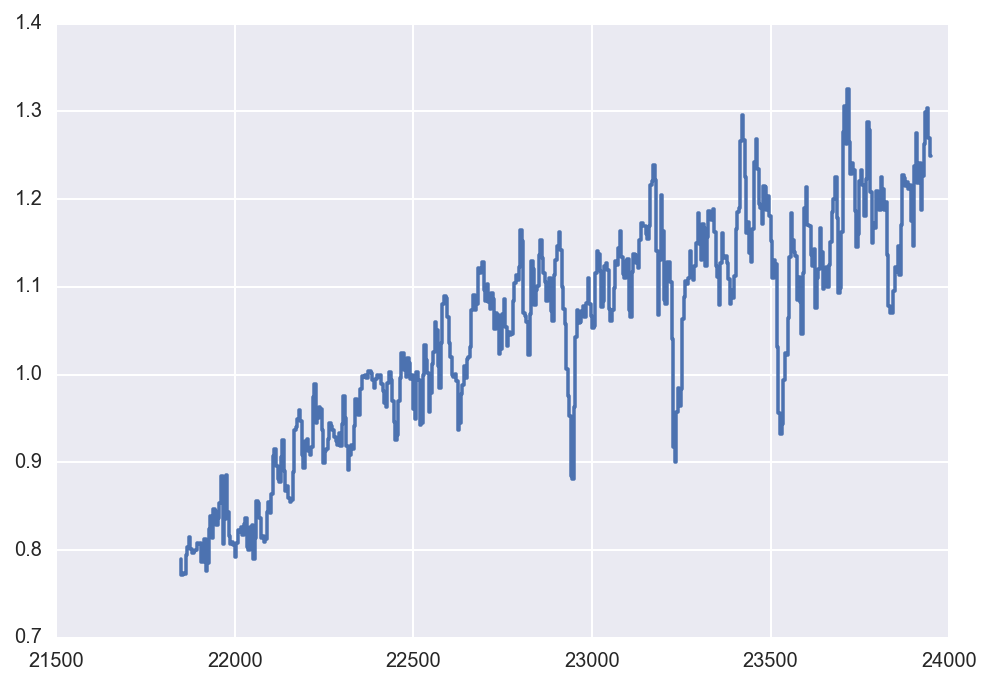

In [15]:
plt.step(wavelength_angstrom[gi], f_star[gi])

In [14]:
f = h5py.File("../data/reduced/"+name_out, "w")
dset1 = f.create_dataset('wls', data=wavelength_angstrom[gi]) #Angstroms
dset2 = f.create_dataset('fls', data=f_star[gi])
dset3 = f.create_dataset('sigmas', data=sig_star[gi])
dset4 = f.create_dataset('masks', data=masks[gi])
f.close()

## The end.